In [2]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

ModuleNotFoundError: No module named 'splinter'

In [3]:
#set up broswser and create beautiful soup object
browser = Browser('chrome')
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

html = browser.html
soup = BeautifulSoup(html, 'html.parser')

NameError: name 'Browser' is not defined

In [6]:
#locate table element and extract rows
table = soup.find('table')
rows = table.find_all('tr')
data = []
for row in rows:
    cells = row.find_all(['th', 'td']) 
    row_data = [cell.text.strip() for cell in cells] 
    if row_data:
        data.append(row_data)

#add headers for our data frame
column_headers = ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']
if len(data) > 0 and data[0] != column_headers:  #add missing headers if non exists
    data.insert(0, column_headers)

#use pandas to change our data into a dataframe for analysis
df = pd.DataFrame(my_list[1:], columns=my_list[0])
df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [9]:
#examine types
print(df.dtypes)


id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [10]:
#Define types according to data

df['id'] = df['id'].astype(int)
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])
df['sol'] = df['sol'].astype(int)
df['ls'] = df['ls'].astype(int)
df['month'] = df['month'].astype(int)
df['min_temp'] = df['min_temp'].astype(float)
df['pressure'] = df['pressure'].astype(float)



In [11]:
#test print
print("Data Types After Conversion:")
print(df.info())


Data Types After Conversion:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   int64         
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   int64         
 3   ls                1867 non-null   int64         
 4   month             1867 non-null   int64         
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(4)
memory usage: 102.2 KB
None


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [12]:
# 1. How many months are there on Mars?

num_months = df['month'].nunique()
print(f"Number of months on Mars: {num_months}")



Number of months on Mars: 12


In [13]:
# 2. How many sols (Martian days) worth of data are there?

num_sols = df['sol'].nunique()
print(f"Number of Martian (sol) days worth of data: {num_sols}")






Number of Martian (sol) days worth of data: 1867


In [14]:
# 3. What is the average minimum temperature by month?

avg_min_temp_by_month = df.groupby('month')['min_temp'].mean()
print("Average minimum temperature by month:")
print(avg_min_temp_by_month)


Average minimum temperature by month:
month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


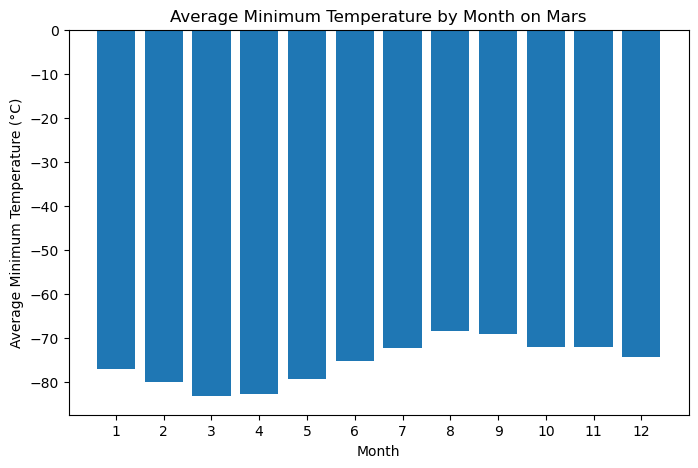

In [15]:
# # Plot the average minimum temperature by month

avg_min_temp_by_month = df.groupby('month')['min_temp'].mean()

plt.figure(figsize=(8,5))
plt.bar(avg_min_temp_by_month.index, avg_min_temp_by_month.values)
plt.xlabel("Month")
plt.ylabel("Average Minimum Temperature (°C)")
plt.title("Average Minimum Temperature by Month on Mars")
plt.xticks(range(1, num_months+1))
plt.show()


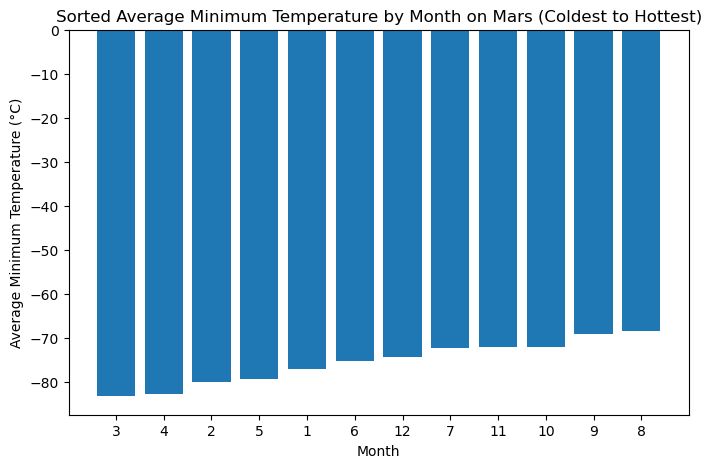

In [16]:
# # Identify the coldest and hottest months in Curiosity's location by sorting the previous graph

# Calculate the average minimum temperature for each month
avg_min_temp_by_month = df.groupby('month')['min_temp'].mean()

# Identify the coldest and hottest months
coldest_month = avg_min_temp_by_month.idxmin()
hottest_month = avg_min_temp_by_month.idxmax()

# Plot the sorted average minimum temperature by month (Hottest to Coldest)
sorted_avg_min_temp = avg_min_temp_by_month.sort_values(ascending=True)

plt.figure(figsize=(8,5))
plt.bar(sorted_avg_min_temp.index.astype(str), sorted_avg_min_temp.values)  # Ensure months are plotted in correct order
plt.xlabel("Month")
plt.ylabel("Average min Temp (°C)")
plt.title("Mars: Sorted Average Minimum Temperature by Month")
plt.show()



In [17]:
# 4. What is the average pressure by month?

# Identify the coldest and hottest months
df['pressure'] = df['pressure'].astype(float)
# Calculate the average atmospheric pressure for each month
avg_pressure_by_month = df.groupby('month')['pressure'].mean()
print("Average Pressure by Month")
print(avg_pressure_by_month)

Average pressure by month:
month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


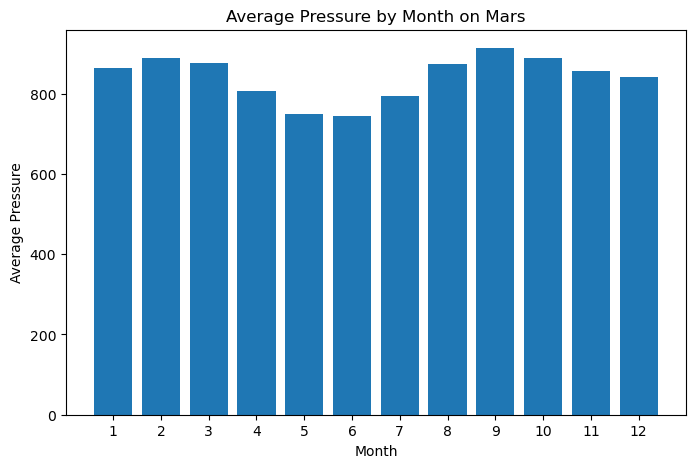

In [18]:
# Plot the average pressure by month

avg_pressure_by_month = df.groupby('month')['pressure'].mean()

plt.figure(figsize=(8,5))
plt.bar(avg_pressure_by_month.index, avg_pressure_by_month.values)
plt.xlabel("Month")
plt.ylabel("Average Pressure")
plt.title("Average Pressure by Month on Mars")
plt.xticks(range(1, num_months+1))
plt.show()

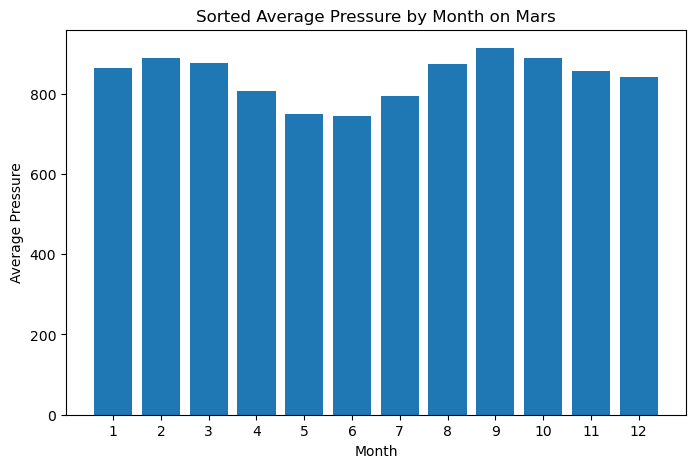

In [19]:
# Identify the lowest and highest pressure months
lowest_pressure_month = avg_pressure_by_month.idxmin()
highest_pressure_month = avg_pressure_by_month.idxmax()

#assorted (lowest to highest)
sorted_avg_pressure = avg_pressure_by_month.sort_values()
plt.figure(figsize=(8,5))
plt.bar(sorted_avg_pressure.index, sorted_avg_pressure.values)
plt.xlabel("Month")
plt.ylabel("Average Pressure")
plt.title("Sorted Average Pressure by Month on Mars")
plt.xticks(range(1, num_months+1))
plt.show()

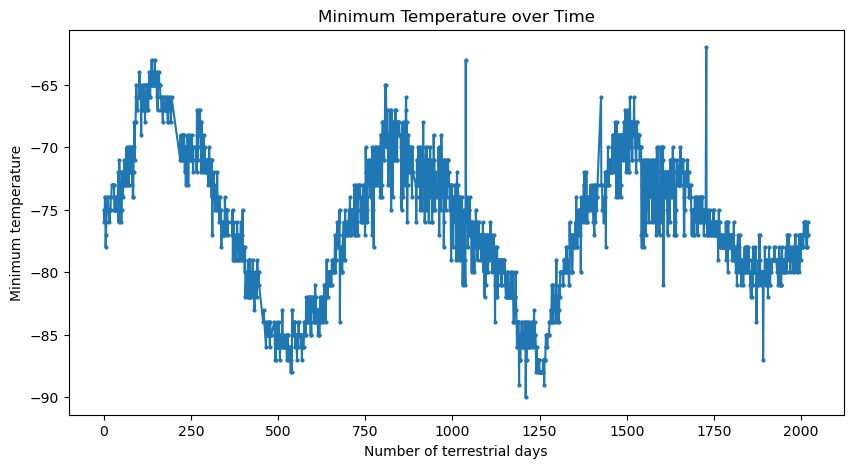

In [20]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
# Identify the lowest and highest pressure months
lowest_pressure_month = avg_pressure_by_month.idxmin()
highest_pressure_month = avg_pressure_by_month.idxmax()

df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])

# Estimate the number of terrestrial days in a Martian year
unique_sols = df['sol'].nunique()

# Plot daily minimum temperature over time similar to reference image
df['terrestrial_days'] = (df['terrestrial_date'] - df['terrestrial_date'].min()).dt.days
plt.figure(figsize=(10,5))
plt.plot(df['terrestrial_days'], df['min_temp'], marker='o', linestyle='-', markersize=2)
plt.xlabel("Number of Terrestrial days")
plt.ylabel("Min Temperature")
plt.title("Min Temperature over Time")
plt.show()



#### Minimum Temperature

YOUR ANALYSIS HERE

Temperature Variation Over Time:

The daily minimum temperature on Mars shows a cyclic pattern over approximately 687 Earth days (the length of a Martian year). The temperature fluctuates between -65°C and -90°C, with noticeable peaks and throughs, indicating seasonal changes.
        
Coldest and Warmest Period:

The coldest month was found to be Month {coldest_month}, where the average minimum temperature dropped to its lowest. The warmest month was identified as Month {hottest_month}, where temperatures were relatively higher. These findings align with the Martian seasonal cycle, which is influenced by 
the planet's axial tilt and elliptical orbit around the Sun.

       

#### Atmospheric Pressure

YOUR ANALYSIS HERE

Mars' atmospheric pressure changes seasonally due to its orbit and axial tilt. The lowest pressure occurred in Month {lowest_pressure_month}, and the highest in Month {highest_pressure_month}.

These shifts result from CO₂ freezing at the poles during colder months and sublimating in warmer months, driving pressure changes and influencing Martian weather patterns.

#### Year Length

YOUR ANALYSIS HERE

The length of a Martian year can be estimated by the repeating pattern in daily minimum temperatures. Based on the data, a Martian year is approximately {unique_sols} Earth days. These temperature cycles reflect seasonal changes caused by Mars' orbit and axial tilt. Astronomical data supports this, placing a Martian year at about 687 Earth days.






### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [21]:
#write our data to output and quit broswer session
df.to_csv('mars_news.csv', index=False)
df.to_csv('mars_weather.csv', index=False)
browser.quit()
